In [17]:
# config
import pickle
import numpy as np
import matplotlib.pyplot as plt
with open('celebratity_type.pkl', 'rb') as f:
    celebratity_type = pickle.load(f)
type_set = ['ISTJ','ISFJ','INFJ','INTJ','ISTP','ISFP','INFP','INTP','ESTP','ESFP','ENFP','ENTP','ESTJ','ESFJ','ENFJ','ENTJ']
def similarity(vec1,vec2):
    vec1=np.array(vec1)
    vec2=np.array(vec2)
    res = np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
    return res
def most_like(simi_all):
    name=max(simi_all.items(),key=lambda x:x[1])[0]
    similar_num = simi_all[name]
    real_type,vec =celebratity_type[name]
    return name,similar_num,real_type
import fastText
classifier = fastText.load_model("model/classify_with_videos.model")
type_content=dict()
with open('MBTI.txt') as f:
        lines =f.readlines()
for line in lines:
    type_ori, content = line.split(':')
    type_content[type_ori]=content[:-1]

In [18]:
# input
strr = input("Please say something: ")

Please say something: I am rich and handsome.


Your MBTI type is:  ISTP

The pop star you are most like to is:  Wangsicong!


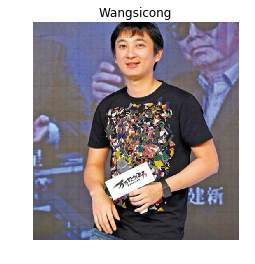

Your similarity is:  0.7082907961595339

Description of ISTP: 
 The crafter(introverted, sensing, thinking, perceiving) People with ISTP personalities enjoy having time to think alone and are fiercely independent. ISTPs also love action, new experiences, hands-on activities, and the freedom to work at their own pace


In [19]:
# output
your_type,value = classifier.predict(strr)
results = classifier.predict(strr,16)
your_types, proba = results
your_types = [item[-4:] for item in your_types]
proba = [item for item in proba]
res = dict(zip(your_types,proba))
your_vec = [res[types] for types in type_set]
simi_all=dict()
for name in celebratity_type.keys():
    cele_type, cele_vec = celebratity_type[name]
    simi_all[name]=similarity(your_vec,cele_vec)
cele_name,simi_num,cele_type = most_like(simi_all)

your_type = your_type[0][-4:]
value = value[0]
print('Your MBTI type is: ',your_type)
print('\nThe pop star you are most like to is: ',cele_name+'!')
pic_name = '_'.join(cele_name.split(' '))+'.jpg'          
pic = plt.imread('pictures/'+pic_name)
plt.imshow(pic)
plt.axis('off')
plt.title(cele_name)
plt.show()
print('Your similarity is: ', simi_num)
print('\nDescription of '+ your_type+': ')
print(type_content[your_type])